Problem Statement :

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

Output Format :

year1 TotalFunding1

year2 TotalFunding2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds=pd.read_csv('E:/CodinggNinjas/Datasets/startup_funding.csv')
df=ds.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [16]:
df.shape


(2372, 11)

In [34]:
df['Date'].loc[2357]='22/01/2015'
df['NewDate']=pd.to_datetime(df['Date'],utc=False).astype('str')
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1844\66009581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].loc[2357]='22/01/2015'
C:\Users\hp\AppData\Local\Temp\ipykernel_1844\66009581.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['NewDate']=pd.to_datetime(df['Date'],utc=False).astype('str')


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,NewDate
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017-01-08
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017-02-08
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017-02-08
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017-02-08
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017-02-08


In [55]:
year=np.array(df['NewDate'].str.split('-',expand=True)[0].value_counts().index,dtype=int)
value=np.array(df['NewDate'].str.split('-',expand=True)[0].value_counts().values,dtype=int)
arg=year.argsort()
year=year[arg]
value=value[arg]

array([2015, 2016, 2017])

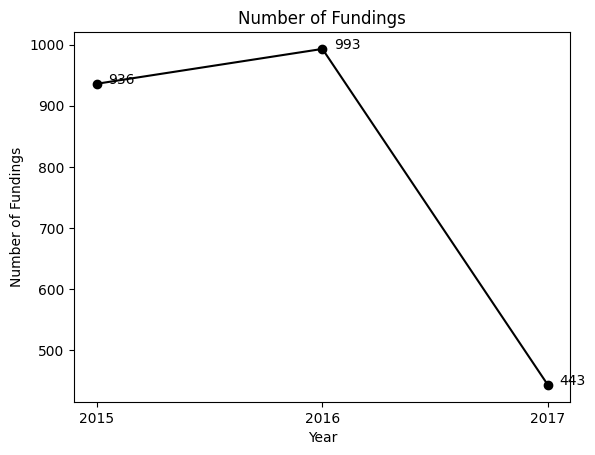

In [66]:
plt.plot(year,value,color='Black',marker='o')
plt.title('Number of Fundings')
plt.xlabel('Year')
plt.ylabel('Number of Fundings')
for i in range(year.size):
    plt.text(year[i]+0.05,value[i]+0.05,value[i])
plt.xticks(year)
plt.show()

In [67]:
for i in range(year.size):
    print(year[i],value[i])

2015 936
2016 993
2017 443


Problem Statement :

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :

city1 number1

city2 number2

In [14]:
df=ds.copy()
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [15]:
df['CityLocation'].fillna(1,inplace=True)
df=df[df['CityLocation']!=1]
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2197,2197,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN
2200,2200,29/04/2015,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,"8,000,000",Series B


In [38]:
def seperaterow(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(seperaterow)
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
city=df.CityLocation.value_counts().index[:10]
value=df.CityLocation.value_counts().values[:10]

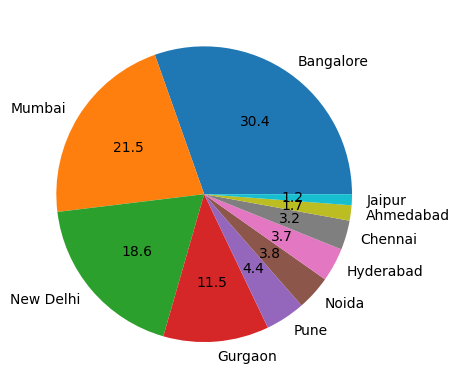

In [46]:
plt.pie(value,labels=city,autopct='%.1f')
# plt.title('Top Indian Cities for Startups')
plt.show()

In [47]:
for i in range(city.size):
    print(city[i],value[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


Problem Statement :
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.
Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.
Output Format :
city1 percent1
city2 percent2
city3 percent3

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds=pd.read_csv('E:/CodinggNinjas/Datasets/startup_funding.csv',encoding='utf-8')
df=ds.copy()
df.head()
# df.shape

(2372, 10)

In [25]:
df['CityLocation'].fillna(1,inplace=True)
df['AmountInUSD'].fillna(1,inplace=True)
df=df[df['CityLocation']!=1]
df=df[df['AmountInUSD']!=1]
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",Private Equity,"6,000,000",Series A
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN
2200,2200,29/04/2015,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,"8,000,000",Series B


In [26]:
def city_name(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(city_name)
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
def numerical(amt):
    l=amt.split(',')
    ans=''
    for i in range(len(l)):
        ans+=l[i].strip()
    return int(ans)
df['AmountInUSD']=df.AmountInUSD.apply(numerical)

df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000,Series A
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000,Series A
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000,NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,500000,NaN
2200,2200,29/04/2015,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,8000000,Series B


In [27]:
d={}
amt=list(df['AmountInUSD'])
cL=list(df.CityLocation)
for i in range(len(amt)):
    if cL[i] not in d:
        d[cL[i]]=amt[i]
    else:
        d[cL[i]]+=amt[i]
amount=np.array(list(d.values()))
city=np.array(list(d.keys()))

arg=(-amount).argsort()[:10]
amount=amount[arg]
city=city[arg]

In [28]:
perc=np.true_divide(amount,np.sum(amount,axis=0,keepdims=True))*100
perc

array([49.7145275 , 16.63401087, 13.89942014, 12.21188917,  2.42644588,
        2.16407891,  1.15307603,  1.00714871,  0.57951865,  0.20988413])

In [29]:
for i in range(city.size):
    print(city[i],format(perc[i],'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3

In [2]:
df=ds.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [3]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [4]:
df.InvestmentType.fillna(1,inplace=True)
df.AmountInUSD.fillna(1,inplace=True)
df=df[df['InvestmentType']!=1]
df=df[df['AmountInUSD']!=1]
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'SeedFunding',
       'PrivateEquity', 'Crowd funding', 'Crowd Funding'], dtype=object)

In [5]:
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'],
      dtype=object)

In [6]:
def numerical(amt):
    s=amt.split(',')
    ans=''
    for i in range(len(s)):
        ans+=s[i]
    return int(ans.strip())
df['AmountInUSD']=df['AmountInUSD'].apply(numerical)
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,2500000,Series A
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000,NaN


In [9]:
invest=list(df['InvestmentType'])
amt=list(df['AmountInUSD'])
d={}
for i in range(len(invest)):
    if invest[i] not in d:
        d[invest[i]]=amt[i]
    else:
        d[invest[i]]+=amt[i]
invest_type=np.array(list(d.keys()))
funding_amt=np.array(list(d.values()))
arg=(-funding_amt).argsort()

invest_type=invest_type[arg]
funding_amt=funding_amt[arg]



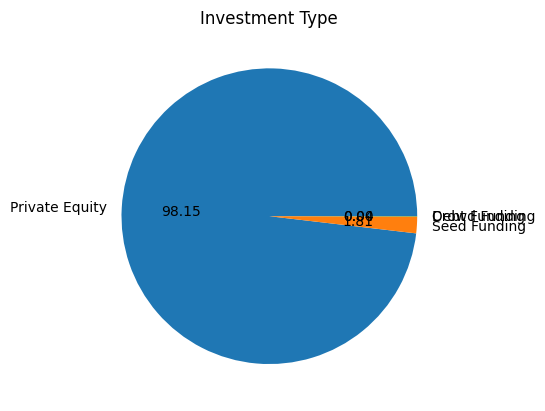

In [10]:
plt.pie(funding_amt,labels=invest_type,autopct='%.2f')
plt.title('Investment Type')
plt.show()

In [16]:
sum_amt=np.sum(funding_amt)
for i in range(funding_amt.size):
    print(invest_type[i],format((funding_amt[i]/sum_amt)*100,'.2f'))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


Problem Statement :
Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.
Output Format :
industry1 percent1
industry2 percent2
industry3 percent3

In [54]:
df=ds.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [55]:
df.IndustryVertical.unique()

array(['Technology', 'Consumer Internet', 'eCommerce', 'Logistics',
       'Others', 'Healthcare', 'Food & Beverage', 'ECommerce', 'Finance',
       'Education', 'Food & Beverages', 'ecommerce', 'healthcare',
       'Real Estate', 'FMCG', 'Reality', 'Auto', 'Ecommerce', 'BFSI',
       'Consumer Interne', 'Online Education Information platform',
       'Brand Licensing Startup',
       'Gourmet Food Discovery & Delivery platform',
       'Transportation & Logistics Platform',
       'Enterprise Marketing Automation platform',
       'Health, Wellness & Beauty Services App', 'Digital Healthcare',
       'Last Minute Hotel Booking App', 'Womens Fashion Wear Portal',
       'Product Learning platform',
       'Online Food ordering & Delivery platform',
       'App based Bus Pooling Services', 'Social Learning Platform',
       'Social Fitness platform', 'On Demand Mobile app developer',
       'Car Maintenance & Management mobile app',
       'Online Wedding Marketplace', 'Splitting Bills 

In [56]:
df.IndustryVertical.fillna(1,inplace=True)
df.AmountInUSD.fillna(1,inplace=True)
df=df[df['IndustryVertical']!=1]
df=df[df['AmountInUSD']!=1]
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",Private Equity,"6,000,000",Series A
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"3,500,000",Series A
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"400,000",NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"500,000",NaN
2200,2200,29/04/2015,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,"8,000,000",Series B


In [57]:
df.IndustryVertical.replace('ECommerce','Ecommerce',inplace=True)
df.IndustryVertical.replace('ecommerce','Ecommerce',inplace=True)
df.IndustryVertical.replace('eCommerce','Ecommerce',inplace=True)
df.IndustryVertical.replace('E-Commerce','Ecommerce',inplace=True)
# df.IndustryVertical.replace('ECommerce','Ecommerce',inplace=True)
df.IndustryVertical.unique()

array(['Technology', 'Consumer Internet', 'Ecommerce', 'Healthcare',
       'Logistics', 'Food & Beverage', 'Finance', 'Education',
       'Food & Beverages', 'Others', 'healthcare', 'FMCG', 'Reality',
       'Real Estate', 'Online Education Information platform',
       'Transportation & Logistics Platform',
       'Enterprise Marketing Automation platform', 'Digital Healthcare',
       'Last Minute Hotel Booking App',
       'Online Food ordering & Delivery platform',
       'App based Bus Pooling Services', 'On Demand Mobile app developer',
       'Car Maintenance & Management mobile app',
       'Online Wedding Marketplace', 'Custom Made furniture e-tailer',
       'QSR Chain', 'Smart Safety Wearable Devices',
       'Cab Sharing service Mobile app',
       'Home Cooked Food Order & Delivery platform',
       'Online School for Analytics learning',
       'Picture creation & Social mobile app',
       'Nonbanking finance company', 'Online Freight Services Aggregator',
       'Onlin

In [58]:
df.IndustryVertical.describe()

count                  1394
unique                  512
top       Consumer Internet
freq                    461
Name: IndustryVertical, dtype: object

In [59]:
def numerical(amt):
    s=amt.split(',')
    ans=''
    for i in range(len(s)):
        ans+=s[i]
    return int(ans.strip())
df['AmountInUSD']=df.AmountInUSD.apply(numerical)
df['IndustryVertical']=df['IndustryVertical'].str.strip()
df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2195,2195,29/04/2015,Icertis,Cloud Enterprise Software,NaN,Pune / US,"Greycroft Partners, Fidelity Growth Partners",Private Equity,6000000,Series A
2196,2196,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,3500000,Series A
2198,2198,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,400000,NaN
2199,2199,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,500000,NaN
2200,2200,29/04/2015,Travel Triangle,Online Travel Marketplace,NaN,Noida,"Bessemer Venture Partners, SAIF Partners",Private Equity,8000000,Series B


In [72]:
amount=list(df['AmountInUSD'])
industry=list(df['IndustryVertical'])
d={}
for i in range(len(amount)):
    if industry[i] not in d:
        d[industry[i]]=amount[i]
    else:
        d[industry[i]]+=amount[i]
amt=np.array(list(d.values()))
invt=np.array(list(d.keys()))

In [73]:
arg=(-amt).argsort()[:5]
amount=amt[arg]
investment=invt[arg]

In [74]:
total=np.sum(amount)
for i in range(amount.size):
    print(investment[i],format(((amount[i]/total)*100),'.2f'))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


Problem Statement :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1
startup2
startup3

In [81]:
df=ds.copy()
for i in df.StartupName.unique():
    print(i)

TouchKin
Ethinos
Leverage Edu
Zepo
Click2Clinic
Billion Loans
Ecolibriumenergy
Droom
Jumbotail
Moglix
Timesaverz
Minjar
MyCity4kids
Clip App
Upwardly.in
Autorox.co
Fabogo
Flickstree
Design Cafe
Innoviti
VDeliver
Bottr.me
Arcatron
QwikSpec
Chumbak
Increff
Vayana
MObiquest
Ambee
Ideal Insurance
Hypernova Interactive
Rentomojo
AirCTO
Playablo
Trupay
Brick2Wall
FableStreet
Monsoon Fintech
MonkeyBox
Noticeboard
Byju’s
Creator’s Gurukul
Fab Hotels
ThinkerBell
1mg
Jhakaas
BigStylist
Gympik.com
Tripeur
RentOnGo
Goomo
MaxMyWealth
Spinny
Healthbuds
Ftcash
BHIVE Workspace
wayForward
GyanDhan
Hungry Foal
ZipLoan
GrowFitter
Stratfit
Multiplier Solutions
ABI Health
Stockal
Guidoo
eSahai.in
Loanmeet
LendingKart
Boxx.ai
PeeSafe.in
Vista Rooms
CoverFox
HyperTrack
Goodera
Digit
Ola
Vanitycask
MrNeeds
MoneyTap
Goodbox
Fincash
PortDesk
EdgeFx
EazyDiner
HealthIntel
Unbxd
DarwinBox
ForeverShop
Insider.in
Fynd
Grow Fit
Fabulyst
mSwipe
OneAssist
Julia Computing
Kissht
Explore Life traveling
Loantap
Voxweb
HUG

In [82]:
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OYOfit','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)

for i in df.StartupName.unique():
    print(i)

TouchKin
Ethinos
Leverage Edu
Zepo
Click2Clinic
Billion Loans
Ecolibriumenergy
Droom
Jumbotail
Moglix
Timesaverz
Minjar
MyCity4kids
Clip App
Upwardly.in
Autorox.co
Fabogo
Flickstree
Design Cafe
Innoviti
VDeliver
Bottr.me
Arcatron
QwikSpec
Chumbak
Increff
Vayana
MObiquest
Ambee
Ideal Insurance
Hypernova Interactive
Rentomojo
AirCTO
Playablo
Trupay
Brick2Wall
FableStreet
Monsoon Fintech
MonkeyBox
Noticeboard
Byju’s
Creator’s Gurukul
Fab Hotels
ThinkerBell
1mg
Jhakaas
BigStylist
Gympik.com
Tripeur
RentOnGo
Goomo
MaxMyWealth
Spinny
Healthbuds
Ftcash
BHIVE Workspace
wayForward
GyanDhan
Hungry Foal
ZipLoan
GrowFitter
Stratfit
Multiplier Solutions
ABI Health
Stockal
Guidoo
eSahai.in
Loanmeet
LendingKart
Boxx.ai
PeeSafe.in
Vista Rooms
CoverFox
HyperTrack
Goodera
Digit
Ola
Vanitycask
MrNeeds
MoneyTap
Goodbox
Fincash
PortDesk
EdgeFx
EazyDiner
HealthIntel
Unbxd
DarwinBox
ForeverShop
Insider.in
Fynd
Grow Fit
Fabulyst
mSwipe
OneAssist
Julia Computing
Kissht
Explore Life traveling
Loantap
Voxweb
HUG

In [84]:
df['StartupName'].fillna(1,inplace=True)
df['AmountInUSD'].fillna(1,inplace=True)
df=df[df['StartupName']!=1]
df=df[df['AmountInUSD']!=1]
def numerical(amt):
    s=amt.split(',')
    ans=''
    for i in range(len(s)):
        ans+=s[i]
    return int(ans.strip())
df['AmountInUSD']=df.AmountInUSD.apply(numerical)

df.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,2500000,Series A
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000,NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,NaN
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000,NaN


In [86]:
name=list(df['StartupName'])
amount=list(df['AmountInUSD'])

d={}
for i in range(len(amount)):
    if name[i] not in d:
        d[name[i]]=amount[i]
    else:
        d[name[i]]+=amount[i]
name=np.array(list(d.keys()))
amount=np.array(list(d.values()))
arg=(-amount).argsort()[:5]
name=name[arg]
amount=amount[arg]

In [87]:
for i in name:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


Problem Statement :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2
startup3 number3

In [1]:
import numpy as np
import pandas as pd
ds=pd.read_csv('E:/CodinggNinjas/Datasets/startup_funding.csv',encoding='utf-8')
df=ds.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [13]:
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
# df['StartupName'].replace('OYOfit','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df.shape

(2372, 10)

In [14]:
df['StartupName'].fillna(1,inplace=True)
df=df[df['StartupName']!=1]
df.shape

(2372, 10)

In [15]:
name=df['StartupName'].value_counts().index[:5]
number_of_round=df['StartupName'].value_counts().values[:5]
number_of_round
name

Index(['Ola', 'Swiggy', 'UrbanClap', 'Paytm', 'Oyo'], dtype='object')

In [16]:
for i in range(name.size):
    print(name[i],number_of_round[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Problem Statement :
Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.
Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.
Output Format :
investorname number

In [9]:
df=ds.copy()
df.tail()


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [11]:
df['InvestorsName'].fillna(1,inplace=True)
df=df[df['InvestorsName']!=1]
df['InvestorsName'].size

2364

In [14]:
name=list(df['InvestorsName'].astype(str))
invt=[]
for i in range(len(name)):
    x=name[i].split(',')
    for j in range(len(x)):
        if x[j]!='':
            invt.append(x[j].strip())
    # invt.append()
invt

['Kae Capital',
 'Triton Investment Advisors',
 'Kashyap Deorah',
 'Anand Sankeshwar',
 'Deepak Jain',
 'Sadashiva NT',
 'Arjun Mehta',
 'Satish Kaul',
 'Anindya Ghose',
 'Kunal Shah',
 'LetsVenture',
 'Anupam Mittal',
 'Hetal Sonpal',
 'Narottam Thudi',
 'Shireesh Palle',
 'Reliance Corporate Advisory Services Ltd',
 'Infuse Ventures',
 'JLL',
 'Asset Management (Asia) Ltd',
 'Digital Garage Inc',
 'Kalaari Capital',
 'Nexus India Capital Advisors',
 'International Finance Corporation',
 'Rocketship',
 'Accel Partners',
 'Jungle Ventures',
 'Shailesh Rao',
 'Venture Highway',
 'BCCL',
 'Blume Ventures',
 'Contrarian Capital India Partners',
 'Emergent Ventures India',
 'Pallav Nadhani',
 'Ashish Gupta',
 'Sharad Sharma',
 'Sirion Labs',
 'India Quotient',
 'Shunwei Capital',
 'Sreeram Iyer',
 'Suvo Sarkar',
 'Anita Gupta',
 'Likemind Ventures',
 'Mitsui & Co.',
 'Dunamis Ventures Pte Ltd',
 'Venture Catalysts',
 'Sourav Ganguly',
 'Ankit Aditya',
 'Moksh Sports Ventures',
 'Fireside V

In [19]:
d={}
for i in range(len(invt)):
    if invt[i] in d:
        d[invt[i]]+=1
    else:
        d[invt[i]]=1
investor_name=np.array(list(d.keys()))
investor_number=np.array(list(d.values()))
arg=(-investor_number).argsort()[:1]
investor_name=investor_name[arg]
investor_number=investor_number[arg]

(array(['Sequoia Capital'], dtype='<U75'), array([64]))

In [20]:
print(investor_name[0],investor_number[0])

Sequoia Capital 64
